<a href="https://colab.research.google.com/github/scarioca/Linkedin-Learning-Courses-Downloader/blob/main/Machine_Learning_AULA_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Avaliação de Desempenho

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Dataset [FuelConsumptionCo2](https://drive.google.com/file/d/1W9N-WGuk--GE8WTwO5bUVf0NrAYpktjD/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
# Seleção das features

X =  df[['ENGINESIZE']] #motor
y = df[['CO2EMISSIONS']] #emissão CO2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
linreg = LinearRegression() #Regressão Linear

linreg.fit(X_train, y_train)

LinearRegression()

###Métricas Regressão Linear

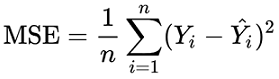

In [ ]:
linreg.score(X_test, y_test) 

0.7954730298981696

In [ ]:
y_pred = linreg.predict(X_test) # valores predição dados de testes

In [ ]:
#Métrica (Custo, Loss, J)

from sklearn.metrics import mean_squared_error

print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))


Erro Quadrático Médio (MSE): 825.4467391571825


###Validação Cruzada 

Pode ser usada na regressão e na classificação

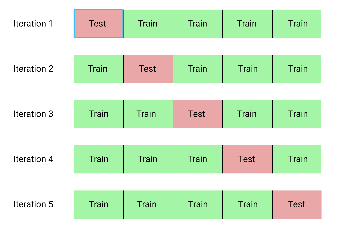

In [ ]:
#Ajustando o modelo com divisões diferentes a cada vez 

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

from sklearn.linear_model import LinearRegression # Linear Regression class.


In [ ]:
linreg2  = LinearRegression()

kfold  = KFold(n_splits=7, shuffle = True) # shuffle=True Embaralhar

result = cross_val_score(linreg2, X, y, cv = kfold)

result


array([0.74099655, 0.7153984 , 0.79435195, 0.78419354, 0.76872905,
       0.79463051, 0.7251368 ])

In [ ]:
from sklearn.model_selection import cross_val_predict

linreg2  = LinearRegression()

kfold  = KFold(n_splits=5, shuffle = True)

y_pred = cross_val_predict(linreg2, X, y, cv = kfold) #método de predição usará o melhor desempenho da validação cruzada

y_pred

array([[203.2649539 ],
       [219.0358614 ],
       [183.68197505],
       ...,
       [242.28289836],
       [250.80422614],
       [250.26410312]])